<a href="https://colab.research.google.com/github/leadeeerq/machine-learning/blob/main/ML_KNearestNeighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Classification with the K-nearest neighbours
Breast cancer data

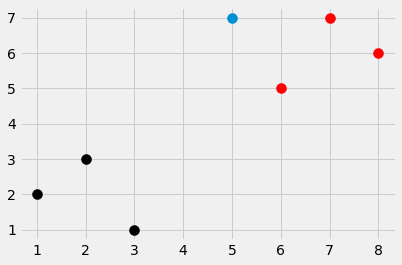 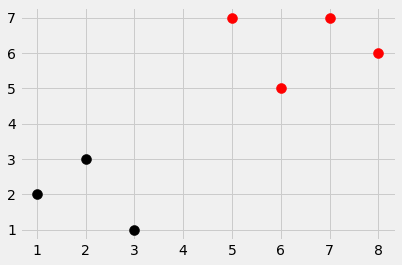

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
import numpy as np
import pandas as pd
import random
from sklearn import preprocessing, neighbors
from sklearn.model_selection import train_test_split

##Load the data

In [22]:
df = pd.read_csv('/content/drive/MyDrive/Projekty Machine Learning/ML_KNearestNeighbors/breast-cancer-wisconsin.data')
df.head()

,id,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epi_cell_size,bare_nuclei,bland_chromation,normal_nucleoli,mitoses,class
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


##Replacing missing values "?" with -99999

In [23]:
df.replace('?', -99999, inplace = True) #Wypełnienie pustych miejsc "outlierami"

##Dropping the ID column
Dropping of the ID column to prevent from fitting classifier to unnecessary information

In [24]:
df.drop('id', axis = 1, inplace = True) 

In [25]:
df.head()

,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epi_cell_size,bare_nuclei,bland_chromation,normal_nucleoli,mitoses,class
0,5,4,4,5,7,10,3,2,1,2
1,3,1,1,1,2,2,3,1,1,2
2,6,8,8,1,3,4,3,7,1,2
3,4,1,1,3,2,1,3,1,1,2
4,8,10,10,8,7,10,9,7,1,4


##Train, test split

In [26]:
X = np.array(df.drop(['class'], axis = 1,))
y = np.array(df['class'])

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

##Classifier

In [28]:
clf = neighbors.KNeighborsClassifier()
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [29]:
accuracy = clf.score(X_test, y_test)
accuracy

0.9714285714285714

##Prediction
We can only use predict on data that is of the same dimensionality as the training data (X) was.

When we want to predict using new values, our program expects the same - a bunch of rows. Even if we want to do it to just one row (with nine values), that row has to be part of another array.

In [30]:
X_train

array([[1, 1, 1, ..., 1, 1, 1],
       [5, 4, 6, ..., 4, 1, 1],
       [4, 4, 2, ..., 2, 1, 2],
       ...,
       [5, 7, 4, ..., 7, 10, 3],
       [1, 1, 1, ..., 1, 1, 1],
       [3, 10, 7, ..., 7, 4, 1]], dtype=object)

In [31]:
# example_measures = np.array([[4, 2, 1, 1, 1, 2, 3, 2, 1]])
example_measures = np.array([[4, 2, 1, 1, 1, 2, 3, 2, 1], [4, 2, 1, 2, 2, 2, 3, 2, 1]])
example_measures

array([[4, 2, 1, 1, 1, 2, 3, 2, 1],
       [4, 2, 1, 2, 2, 2, 3, 2, 1]])

In [32]:
prediction = clf.predict(example_measures)
prediction

array([2, 2])

##Rewritten KNN algorithm

###Euclidean distance

In [33]:
from math import sqrt

In [34]:
plot1 = [1, 3]
plot2 = [2, 5]

In [35]:
euclidean_dist = sqrt((plot1[0] - plot2[0])**2 + (plot1[1] - plot2[1])**2)
euclidean_dist

2.23606797749979

###KNN algorithm

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
from matplotlib import style
from collections import Counter
style.use('fivethirtyeight')

In [37]:
dataset = {'k': [[1, 2], [2, 3], [3, 1]],
           'r': [[6, 5], [7, 7], [8,6]]}

new_features = [5, 7]

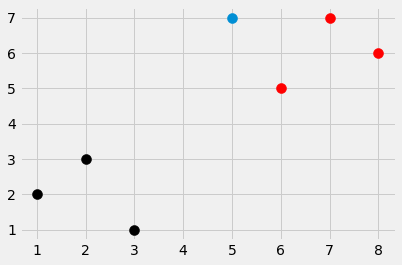

In [38]:
# for i in dataset:
#   for ii in dataset[i]:
#     plt.scatter(ii[0], ii[1], s = 100, color = i)

[[plt.scatter(ii[0], ii[1], s=100, color=i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_features[0], new_features[1], s=100)
plt.show()

In [60]:
def k_nearest_neighbors (data, predict, k = 3):
  if len(data) >= k:
    warnings.warn('K is set to value less than total voting groups')

  distances = []
  for group in data:
    for features in data[group]:
      # euclidean_dist = sqrt((features[0] - predict[0])**2 + (features[1] - predict[1])**2) #Classical approach for 2-dimension features
      # euclidean_dist = np.sqrt(np.sum((np.array(features) - np.array(predict))**2)) #Better approach
      euclidean_dist = np.linalg.norm(np.array(features) - np.array(predict))
      distances.append([euclidean_dist, group]) #List of lists with the distance and the group

  # for i in sorted(distances)[:k]:
  #   i[i]

  votes = [i[1] for i in sorted(distances)[:k]] #K of the lowest distances
  vote_result = Counter(votes).most_common(1)[0][0] #0th element is the label

  confidence = Counter(votes).most_common(1)[0][1] / k #1st element is number of instances
  # print(vote_result, confidence)

  return vote_result, confidence

In [55]:
result = k_nearest_neighbors(dataset, new_features, k = 3)
result

[('r', 3)]
r 1.0


('r', 1.0)

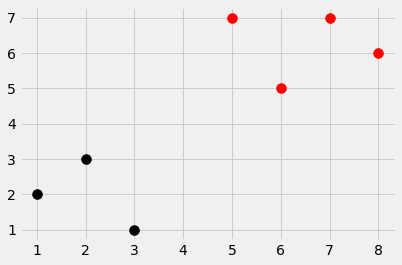

In [41]:
[[plt.scatter(ii[0], ii[1], s=100, color=i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_features[0], new_features[1], s=100, color = result)
plt.show()

##Comparison between sklearn and rewritten KNN algorithm

###Convertning values to float / some of them were in quotes

In [45]:
full_data = df.astype(float).values.tolist()
full_data[:5]

[[5.0, 4.0, 4.0, 5.0, 7.0, 10.0, 3.0, 2.0, 1.0, 2.0],
 [3.0, 1.0, 1.0, 1.0, 2.0, 2.0, 3.0, 1.0, 1.0, 2.0],
 [6.0, 8.0, 8.0, 1.0, 3.0, 4.0, 3.0, 7.0, 1.0, 2.0],
 [4.0, 1.0, 1.0, 3.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [8.0, 10.0, 10.0, 8.0, 7.0, 10.0, 9.0, 7.0, 1.0, 4.0]]

In [46]:
random.shuffle(full_data) #Shuffle works inplace
full_data[:5]

[[2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [1.0, 5.0, 8.0, 6.0, 5.0, 8.0, 7.0, 10.0, 1.0, 4.0],
 [5.0, 2.0, 4.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0],
 [4.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [2.0, 3.0, 1.0, 1.0, 3.0, 1.0, 1.0, 1.0, 1.0, 2.0]]

###Train, test split

In [48]:
test_size = 0.2
train_set = {2: [], 4:[]}
test_set = {2: [], 4:[]}
train_data = full_data[:-int(test_size * len(full_data))]
test_data = full_data[-int(test_size * len(full_data)):]

for i in train_data:
  train_set[i[-1]].append(i[:-1])

for i in test_data:
  test_set[i[-1]].append(i[:-1])

In [62]:
correct = 0
total = 0

for group in test_set:
  for data in test_set[group]:
    vote, confidence = k_nearest_neighbors(train_set, data, k=5)
    if group == vote:
      correct += 1
    else:
      print(confidence) #Print confidence of votes that are incorrect
    total += 1

print('Accuracy: ', correct/total)

0.8
0.6
0.8
0.6
Accuracy:  0.9712230215827338


In [68]:
accuracy = clf.score(X_test, y_test)
print('KNN accuracy: ', accuracy)

KNN accuracy:  0.9714285714285714
